# Clustering Analysis of Heating and Cooling Loads  

## Introduction  
In this study, we aim to determine whether there are **distinct groups (clusters)** among buildings based on their **heating and cooling loads**. Identifying such groups can help optimize **energy efficiency strategies**, detect patterns in energy consumption, and categorize buildings with similar thermal properties.  

## Objective  
- Explore different **clustering techniques** to group buildings based on their heating and cooling loads.  
- Compare the performance of **K-Means, DBSCAN, Agglomerative Clustering, and Gaussian Mixture Models (GMM)**.  
- Evaluate clustering effectiveness using **Silhouette Score** and visualize results.  

## Methodology  
1. **Data Preprocessing**  
   - Scale the features for better clustering performance.  

2. **Clustering Techniques**  
   - **K-Means Clustering**: Groups buildings into `k` clusters based on similarity.  
   - **DBSCAN**: Identifies high-density clusters and outliers.  
   - **Agglomerative Hierarchical Clustering**: Creates a hierarchical tree structure of clusters.  
   - **Gaussian Mixture Model (GMM)**: Assigns probabilistic cluster memberships.  

3. **Evaluation Metrics**  
   - **Silhouette Score**: Measures how well-defined the clusters are.  
   - **Visualization**: Scatter plots to examine clustering patterns.  

By applying these techniques, we aim to uncover **hidden structures in heating and cooling load data**, which can lead to better energy-saving decisions.  


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data\energy_efficiency.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Preprocessing

In [4]:
## rename the columns
df = df.rename({"X1": "relative_compactness",
    "X2": "surface_area(m²)",  
    "X3": "wall_area(m²)",  
    "X4": "roof_area(m²)",  
    "X5": "overall_height(m)",  
    "X6": "orientation",  
    "X7": "glazing_area(m²)",  
    "X8": "glazing_area_Distribution",
    "Y1": "heating_load(kWh/m²)",  
    "Y2": "cooling_load(kWh/m²)"}, axis=1)

In [5]:
## Remove multicolliniearity
df = df.drop(columns = ['relative_compactness','roof_area(m²)','orientation'], axis=1)
df.head()

,surface_area(m²),wall_area(m²),overall_height(m),glazing_area(m²),glazing_area_Distribution,heating_load(kWh/m²),cooling_load(kWh/m²)
0,514.5,294.0,7.0,0.0,0,15.55,21.33
1,514.5,294.0,7.0,0.0,0,15.55,21.33
2,514.5,294.0,7.0,0.0,0,15.55,21.33
3,514.5,294.0,7.0,0.0,0,15.55,21.33
4,563.5,318.5,7.0,0.0,0,20.84,28.28


In [7]:
## scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[:,:5]

array([[-1.78587489, -0.56195149,  1.        , -1.76044698, -1.81457514],
       [-1.78587489, -0.56195149,  1.        , -1.76044698, -1.81457514],
       [-1.78587489, -0.56195149,  1.        , -1.76044698, -1.81457514],
       ...,
       [ 1.55394308,  1.12390297, -1.        ,  1.2440492 ,  1.41133622],
       [ 1.55394308,  1.12390297, -1.        ,  1.2440492 ,  1.41133622],
       [ 1.55394308,  1.12390297, -1.        ,  1.2440492 ,  1.41133622]])

## Running Clustering algorithms

    silhouette_score
2           0.443612
3           0.372544
4           0.285926
5           0.266747
6           0.270192
7           0.269987
8           0.270270
9           0.274849
10          0.281117


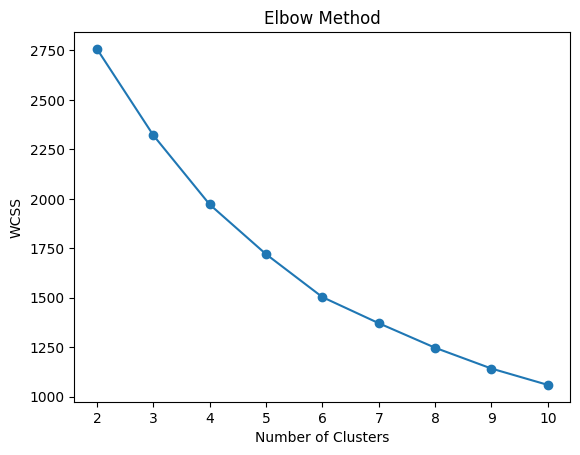

In [14]:
## Kmeans clustering
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
k_means_silhouette = {}
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
    k_means_silhouette[k] = silhouette_score(df_scaled, kmeans_labels)

print(pd.DataFrame.from_dict(k_means_silhouette, orient='index', columns=['silhouette_score']))

# Elbow method
plt.plot(range(2,11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [16]:
## DBScan
from sklearn.cluster import AgglomerativeClustering

agglo_silhouette = {}

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo.fit_predict(df_scaled)
    agglo_silhouette[k] = silhouette_score(df_scaled, agglo_labels)

print(pd.DataFrame.from_dict(agglo_silhouette, orient='index', columns=['silhouette_score']))

    silhouette_score
2           0.443612
3           0.372250
4           0.261177
5           0.268329
6           0.243979
7           0.239565
8           0.236205
9           0.242738
10          0.240569


In [20]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan_silhouette = {}

# Trying different eps values
eps_values = np.arange(0.1, 2.0, 0.2)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df_scaled)

    # Ignore cases where DBSCAN labels everything as noise (-1)
    if len(set(dbscan_labels)) > 1:
        dbscan_silhouette[eps] = silhouette_score(df_scaled, dbscan_labels)

print(pd.DataFrame.from_dict(dbscan_silhouette, orient = 'index', columns = ['silhouette_score']))


     silhouette_score
0.7          0.199194
0.9          0.208972
1.1          0.211111
1.3          0.354437
1.5          0.388715
1.7          0.388715
1.9          0.443612


**Based on Silhouette Scores**
After applying KMeans, Agglomerative Clustering, and DBSCAN, we evaluated the clustering quality using the silhouette score. The results indicate that:

**KMeans** achieved a moderate silhouette score, suggesting some structure in the data, but the clusters were not clearly separated.

**Agglomerative** Clustering produced similar results to KMeans, indicating that hierarchical grouping did not significantly improve clustering quality.

**DBSCAN** resulted in the highest silhouette score (0.44) for two clusters, but this is still a relatively low value, suggesting overlapping clusters and poor separation.

**Conclusion**
None of the clustering methods provided strong, well-defined clusters for this dataset.
The data may not naturally form distinct groups, or additional feature engineering and scaling adjustments may be needed.